In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import glob
#from netCDF4 import Dataset

In [2]:
filesindir = []
for i, file in enumerate(glob.glob('./input/*')):
    filesindir.append(file)
    print(i, file)
#print(filesindir)

0 ./input\19x37.png
1 ./input\20x37.png
2 ./input\8x75.png
3 ./input\Gap_12x75f2_on_POLf0.txt
4 ./input\Gap_19x37f2_on_POLf0.txt
5 ./input\Gap_19x37f4_on_POLf0.txt
6 ./input\Gap_19x37fanf2_on_POLf0.txt
7 ./input\Gap_19x37fanf4_on_POLf0.txt
8 ./input\Gap_REFf2_on_POLf0.txt
9 ./input\POL_f3_on_POL_f0.txt
10 ./input\RAM12x75_f2_on_POL_f0.txt
11 ./input\RAM12x75_f3_on_POL_f0.txt
12 ./input\RAM14x75_f3_on_POL_f0.txt
13 ./input\RAM14x75_f4_on_POL_f0.txt
14 ./input\RAM16x75_f4_on_POL_f0.txt
15 ./input\RAM16x75_f5_on_POL_f0.txt
16 ./input\RAM17_f3_on_POL_f0.txt
17 ./input\RAM17_fanf3_on_POL_f0.txt
18 ./input\RAM19_f2_on_POL_f0.txt
19 ./input\RAM19_f2_on_POL_f0f1_comb.txt
20 ./input\RAM19_f2_on_POL_f0_comb.txt
21 ./input\RAM19_f3_on_POL_f0.txt
22 ./input\RAM19_f3_on_POL_f0comb.txt
23 ./input\RAM19_f3_on_RAM19_f0.txt
24 ./input\RAM19_f4_on_POL_f0.A1X
25 ./input\RAM19_f4_on_POL_f0.txt
26 ./input\RAM19_fanf2_on_POL_f0.txt
27 ./input\RAM19_fanf4_on_POL_f0.txt
28 ./input\REF_f2_on_POL_f0.txt


In [3]:
def readtodataframe(file, scenario):
    path = './input/'
    filename = path + file + '.txt'
    column_names = ['BasShotNo', 'MonShotNo', 'BasRecvNo', 'MonRecvNo', 'OffsDiff', 'AzimDiff', 'CMPDist', 'CMPInDist', 'CMPCrDist', 'SouDist', 'SouInDist', 'SouCrDist', 'RecDist', 'RecInDist', 'RecCrDist', 'SouRecDist']
    rowstoskip = 2
    df_raw = pd.read_csv(filename, names=column_names, skiprows=rowstoskip, delim_whitespace=True)
    df_raw['Scenario'] = scenario
    return df_raw

In [4]:
'''
df_raw_POL_f3_on_POL_f0 = readtodataframe('POL_f3_on_POL_f0', '8x75m on 8x75m')
df_raw_RAM19_f3_on_POL_f0 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m on 8x75m')
df_raw_RAM19_f3_on_POL_f0comb = readtodataframe('RAM19_f3_on_POL_f0comb', '19x37.5m on 8x75m inc interleaved')
df_raw_RAM19_f3_on_RAM19_f0 = readtodataframe('RAM19_f3_on_RAM19_f0', '19x37.5m on 19x37.5m')
df_raw_RAM17_f3_on_POL_f0 = readtodataframe('RAM17_f3_on_POL_f0', '17x37.5m on 8x75m')
df_raw_RAM17_fanf3_on_POL_f0 = readtodataframe('RAM17_fanf3_on_POL_f0', '17x37.5m with fan on 8x75m')
'''

"\ndf_raw_POL_f3_on_POL_f0 = readtodataframe('POL_f3_on_POL_f0', '8x75m on 8x75m')\ndf_raw_RAM19_f3_on_POL_f0 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m on 8x75m')\ndf_raw_RAM19_f3_on_POL_f0comb = readtodataframe('RAM19_f3_on_POL_f0comb', '19x37.5m on 8x75m inc interleaved')\ndf_raw_RAM19_f3_on_RAM19_f0 = readtodataframe('RAM19_f3_on_RAM19_f0', '19x37.5m on 19x37.5m')\ndf_raw_RAM17_f3_on_POL_f0 = readtodataframe('RAM17_f3_on_POL_f0', '17x37.5m on 8x75m')\ndf_raw_RAM17_fanf3_on_POL_f0 = readtodataframe('RAM17_fanf3_on_POL_f0', '17x37.5m with fan on 8x75m')\n"

In [5]:
#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')
df_1 = readtodataframe('Gap_REFf2_on_POLf0', '10x75.5m - 2deg on 8x75m')
df_2 = readtodataframe('Gap_12x75f2_on_POLf0', '12x75m - 2deg on 8x75m')
#df_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')
#df_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')
#df_5 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')
#df_6 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m - 3deg on 8x75m')
df_3 = readtodataframe('Gap_19x37f2_on_POLf0', '19x37.5m - 2deg on 8x75m')
#df_5 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m - 3deg on 8x75m')
df_4 = readtodataframe('Gap_19x37f4_on_POLf0', '19x37.5m - 4deg on 8x75m')
df_5 = readtodataframe('Gap_19x37fanf2_on_POLf0', '19x37.5m - 150% Fanning - 2deg on 8x75m')
df_6 = readtodataframe('Gap_19x37fanf4_on_POLf0', '19x37.5m - 150% Fanning - 4deg on 8x75m')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [6]:
'''#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')
df_1 = readtodataframe('REF_f2_on_POL_f0', '10x75.5m - 2deg on 8x75m')
df_2 = readtodataframe('Gap_12x75f2_on_POLf0', '12x75m - 2deg on 8x75m')
df_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')
df_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')
df_5 = readtodataframe('RAM14x75_f4_on_POL_f0', '14x75m - 4deg on 8x75m')
df_6 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')
'''

"#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')\ndf_1 = readtodataframe('REF_f2_on_POL_f0', '10x75.5m - 2deg on 8x75m')\ndf_2 = readtodataframe('Gap_12x75f2_on_POLf0', '12x75m - 2deg on 8x75m')\ndf_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')\ndf_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')\ndf_5 = readtodataframe('RAM14x75_f4_on_POL_f0', '14x75m - 4deg on 8x75m')\ndf_6 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')\n"

In [7]:
def offset_split(df, channo):
    df['Channel Range'] = df['BasRecvNo'].apply(lambda x: '< '+str(channo) if ((x % 408 < channo) & (x % 408 > 0)) else '> '+str(channo))
    return df
    

In [8]:
df_1 = offset_split(df_1, 100)
df_2 = offset_split(df_2, 100)
df_3 = offset_split(df_3, 100)
df_4 = offset_split(df_4, 100)
df_5 = offset_split(df_5, 100)
df_6 = offset_split(df_6, 100)

In [9]:
df_1.replace(-999.25, np.nan, inplace=True)
df_2.replace(-999.25, np.nan, inplace=True)
df_3.replace(-999.25, np.nan, inplace=True) 
df_4.replace(-999.25, np.nan, inplace=True)
df_5.replace(-999.25, np.nan, inplace=True) 
df_6.replace(-999.25, np.nan, inplace=True) 

In [10]:
df_combined = pd.concat([df_1, 
                         df_2, 
                         df_3, 
                         df_4, 
                         df_5,
                         df_6,])

In [11]:
def plot_dist(df, attrib, maxval, title, plttype='violin'):
    sns.set_style("darkgrid")
    sns.set_context('poster')
    sns.set_palette('Paired')
    plt.figure(figsize=(20,16))
    plt.title(title)
    plt.xticks(rotation=20)
    plt.gca().invert_yaxis()
    plt.ylim(maxval, -maxval/20)
    if plttype == 'violin':
        #sns.violinplot(data=df[df[attrib] <= 70], x='Scenario', y=attrib, hue='Channel Range', split=True, cut=0, scale='count')
        #sns.violinplot(data=df[df[attrib] <= maxval], x='Scenario', y=attrib, split=True, cut=0, scale='count')
        sns.violinplot(data=df, x='Scenario', y=attrib, hue='Channel Range', split=True, cut=0, scale='count')
    else:
        sns.boxplot(data=df, x='Scenario', y=attrib)#, hue='Channel Range')

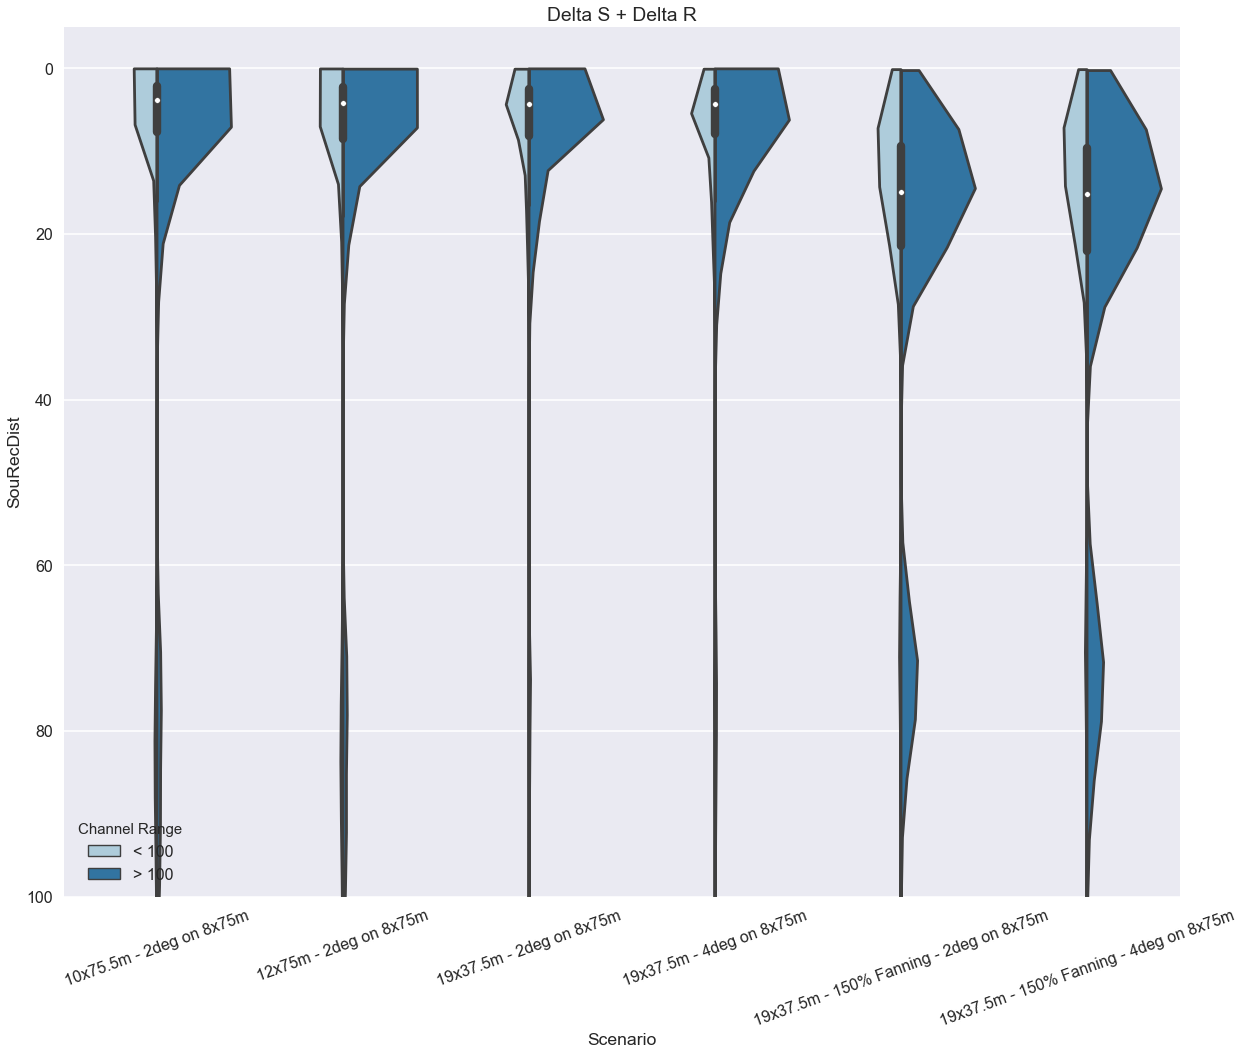

In [12]:
plot_dist(df_combined, 'SouRecDist', 100, 'Delta S + Delta R', plttype='violin')

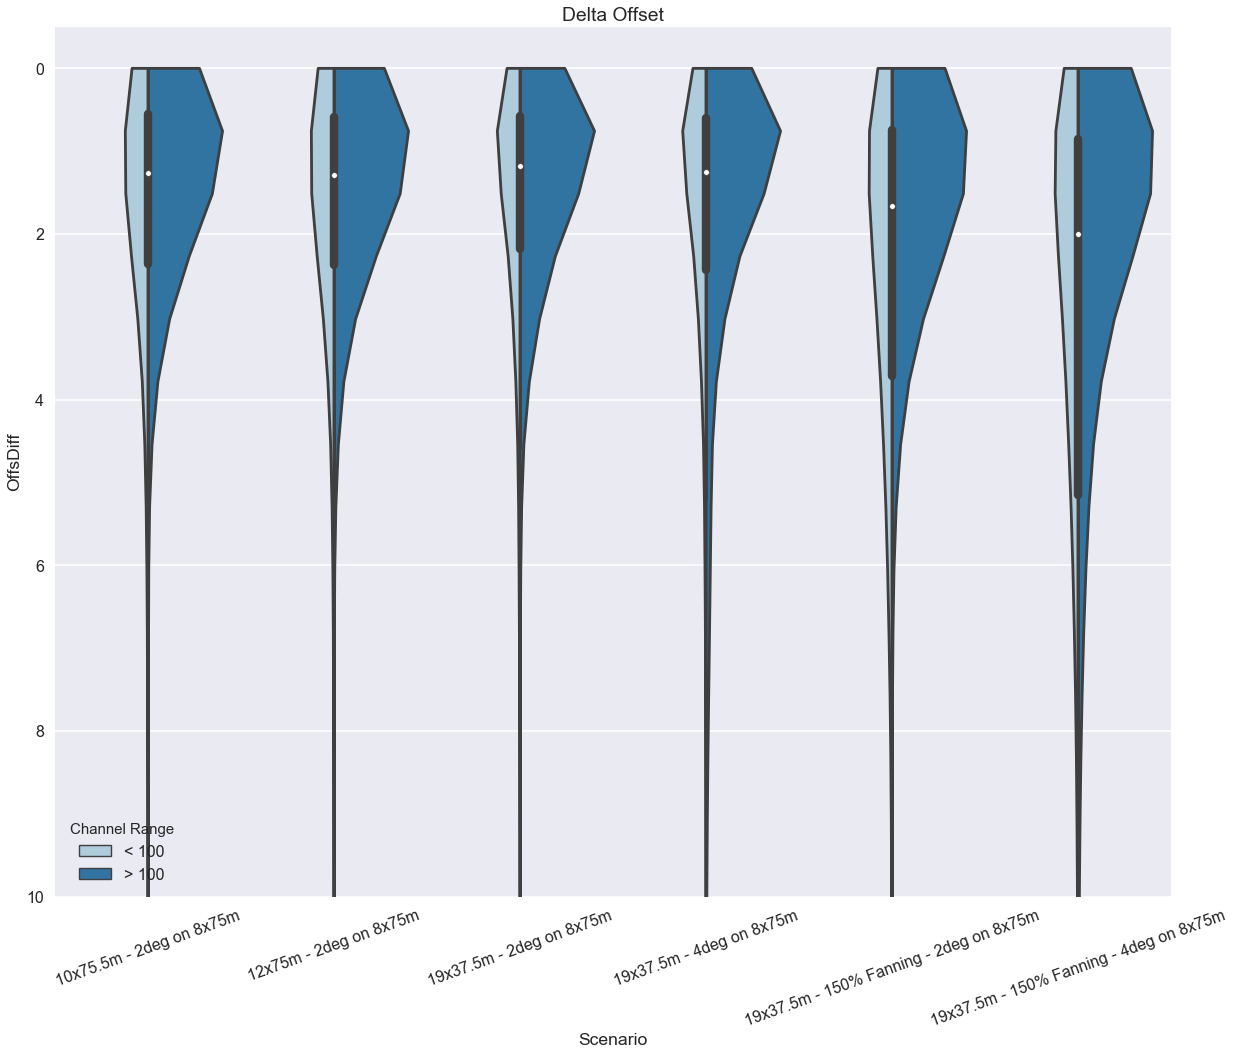

In [13]:
plot_dist(df_combined, 'OffsDiff', 10, 'Delta Offset', plttype='violin')

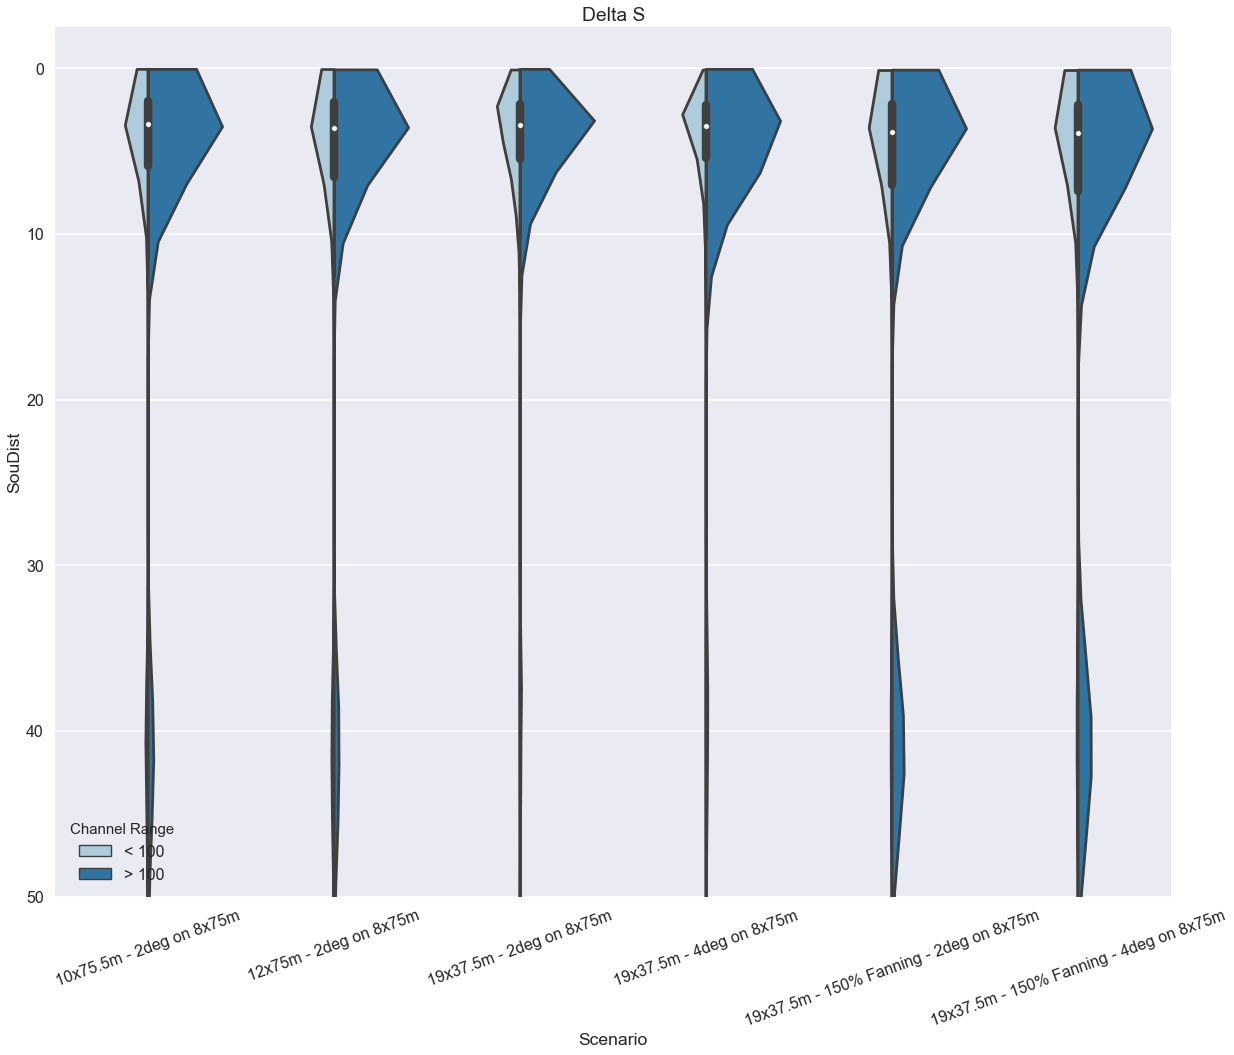

In [14]:
plot_dist(df_combined, 'SouDist', 50, 'Delta S', plttype='violin')

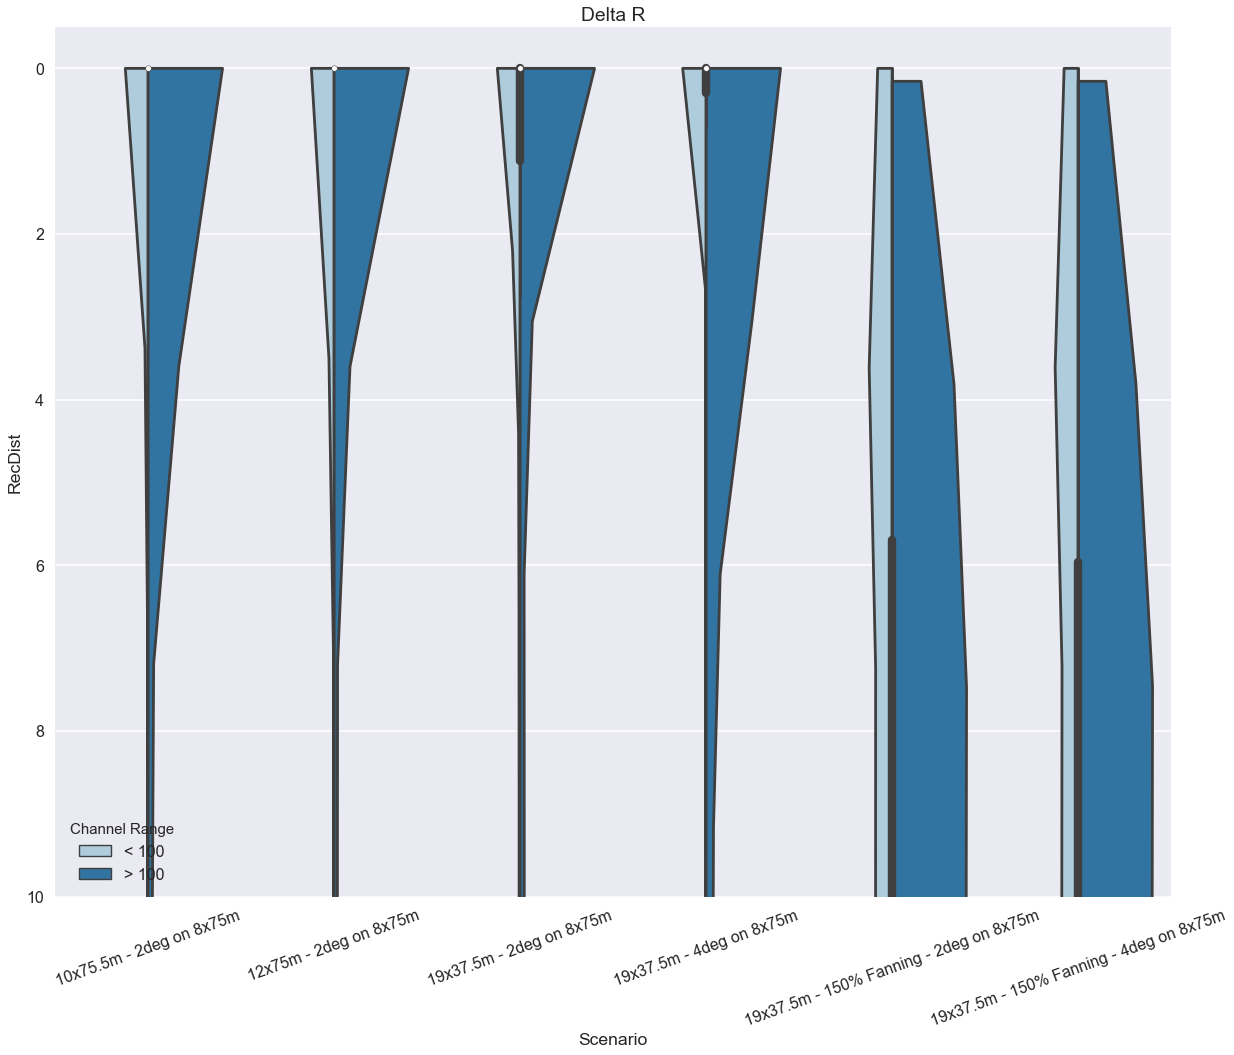

In [15]:
plot_dist(df_combined, 'RecDist', 10, 'Delta R', plttype='violin')

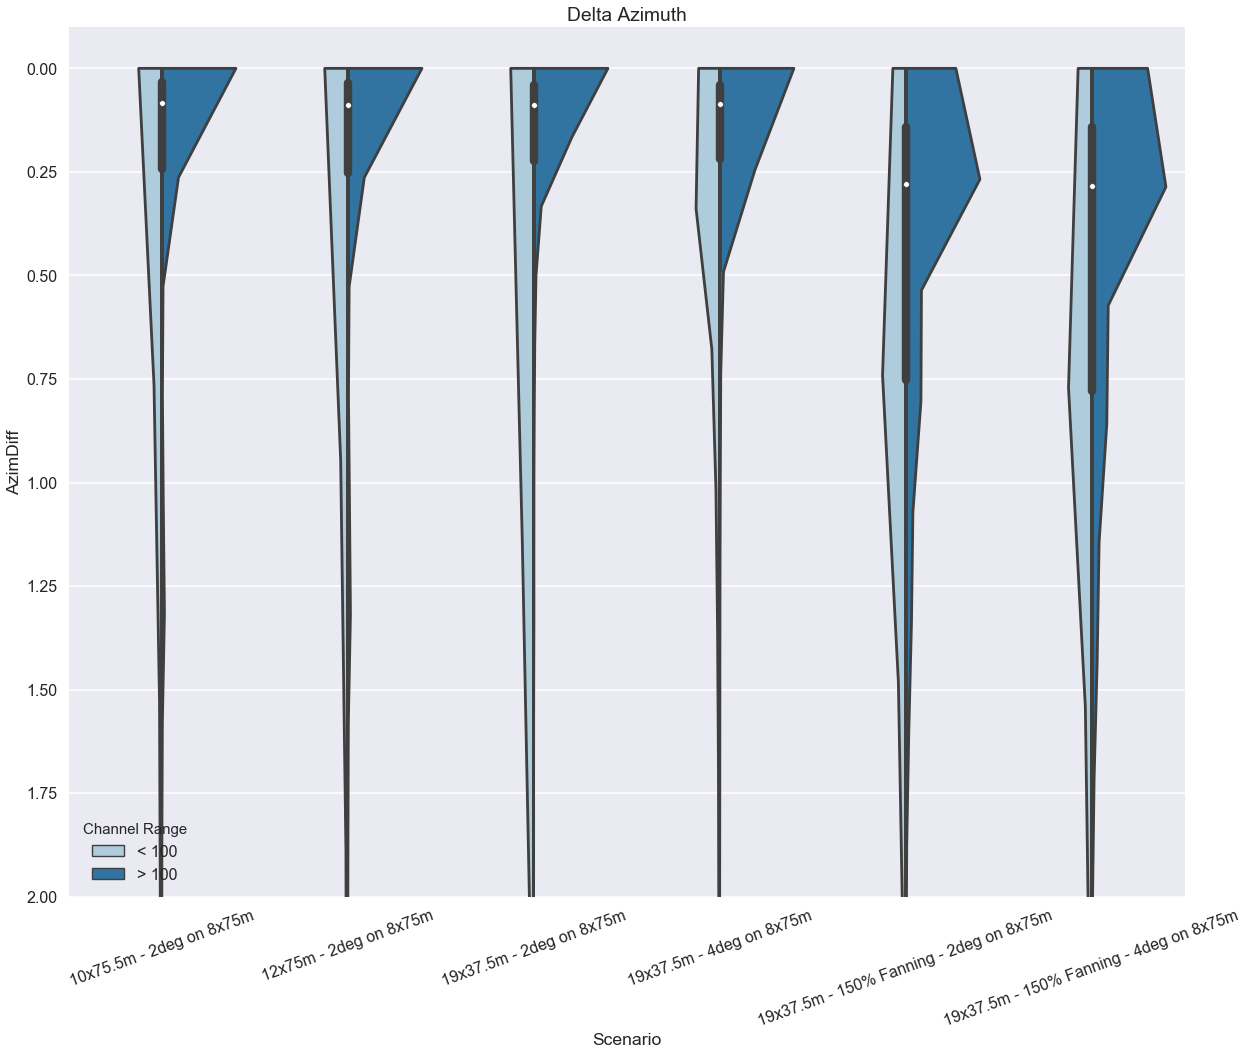

In [16]:
plot_dist(df_combined, 'AzimDiff', 2, 'Delta Azimuth', plttype='violin')

In [17]:
def make_summary(df, attribute):
    #summary = df.describe(percentiles=[0.1, 0.25, 0.5, 0.9])[['OffsDiff', 'AzimDiff', 'CMPDist', 'CMPInDist', 'CMPCrDist', 'SouDist', 'SouInDist', 'SouCrDist', 'RecDist', 'RecInDist', 'RecCrDist', 'SouRecDist']].round(decimals=1).T
    summary = df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])[[attribute]].round(decimals=1)
    #summary['Scenario'] = df[['Scenario']].iloc[0,0]
    #summary = summary.set_index([attribute])
    summary = summary.T
    summary['Scenario'] = df[['Scenario']].iloc[0,0]
    summary = summary.set_index(['Scenario']).reset_index()
    return summary

In [18]:
def makefullsummary(attribute):
    summary = make_summary(df_1, attribute)
    summary = summary.append(make_summary(df_2, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_3, attribute), ignore_index=True)    
    summary = summary.append(make_summary(df_4, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_5, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_6, attribute), ignore_index=True)
    return summary

In [19]:
def make_heatmap(df, caption):
    cm = sns.light_palette("red", as_cmap=True)
    s = df.style.set_caption(caption).background_gradient(cmap=cm).hide_index().hide_columns(['count'])
    #s = df.style.set_caption(caption).background_gradient(cmap=cm).hide_index()
    return s
    

In [20]:
summary_offsetdiff = makefullsummary('OffsDiff')
make_heatmap(summary_offsetdiff, 'Delta Offset')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,5.2,11.9,0,0.2,0.6,1.3,2.4,19.1,74.9
12x75m - 2deg on 8x75m,5.3,12,0,0.2,0.6,1.3,2.4,22.4,75
19x37.5m - 2deg on 8x75m,3,8.4,0,0.2,0.6,1.2,2.2,3.5,74.9
19x37.5m - 4deg on 8x75m,3.3,8.6,0,0.2,0.6,1.3,2.4,5,74.9
19x37.5m - 150% Fanning - 2deg on 8x75m,7.7,14,0,0.3,0.7,1.7,3.7,35.5,75
19x37.5m - 150% Fanning - 4deg on 8x75m,8.4,14.4,0,0.3,0.9,2,5.1,35.6,74.9


In [21]:
summary_sourcerecdist = makefullsummary('SouRecDist')
make_heatmap(summary_sourcerecdist, 'Delta S + Delta R')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,21.4,73.7,0.1,1.3,2.2,3.9,7.7,72.8,697.1
12x75m - 2deg on 8x75m,18.2,58.1,0.1,1.2,2.3,4.2,8.5,71.8,702.1
19x37.5m - 2deg on 8x75m,13.9,43.3,0.1,1.4,2.5,4.4,8.1,18.1,608.6
19x37.5m - 4deg on 8x75m,19.3,80.3,0.1,1.3,2.5,4.3,7.9,17.5,612.5
19x37.5m - 150% Fanning - 2deg on 8x75m,32.2,74.6,0.2,5.7,9.4,15,21.5,73.4,705.5
19x37.5m - 150% Fanning - 4deg on 8x75m,39,94.9,0.2,5.9,9.6,15.2,22,74.5,707.6


In [22]:
summary_sourcedist = makefullsummary('SouDist')
make_heatmap(summary_sourcedist, 'Delta S')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,11.7,36.6,0.1,1.2,2,3.4,5.9,37.6,343.8
12x75m - 2deg on 8x75m,10.2,28.8,0.1,1.1,2.1,3.6,6.5,37.2,346
19x37.5m - 2deg on 8x75m,7.7,21.5,0.1,1.2,2.2,3.4,5.4,8.2,308.6
19x37.5m - 4deg on 8x75m,10.5,40,0.1,1.2,2.2,3.5,5.4,7.9,310.2
19x37.5m - 150% Fanning - 2deg on 8x75m,14.3,38.5,0.1,1.4,2.1,3.9,7.1,40.9,350.6
19x37.5m - 150% Fanning - 4deg on 8x75m,17.7,48.6,0.1,1.4,2.2,3.9,7.4,41.5,352


In [23]:
summary_recdist = makefullsummary('RecDist')
make_heatmap(summary_recdist, 'Delta R')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,9.7,37.3,0,0,0,0,0,31.7,356
12x75m - 2deg on 8x75m,8.1,29.6,0,0,0,0,0,30.9,356.4
19x37.5m - 2deg on 8x75m,6.2,22.2,0,0,0,0,1.1,14.2,302.3
19x37.5m - 4deg on 8x75m,8.8,40.5,0,0,0,0,0.3,13.7,302.3
19x37.5m - 150% Fanning - 2deg on 8x75m,17.9,36.5,0,2.4,5.7,11.3,17.4,31.5,362.4
19x37.5m - 150% Fanning - 4deg on 8x75m,21.3,46.6,0,2.6,6,11.4,17.8,32.8,361.6


In [24]:
summary_azmdiff = makefullsummary('AzimDiff')
make_heatmap(summary_azmdiff, 'Delta Azimuth')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75.5m - 2deg on 8x75m,0.5,1.9,0,0,0,0.1,0.2,1.3,75.7
12x75m - 2deg on 8x75m,0.5,2.2,0,0,0,0.1,0.3,1.2,93.6
19x37.5m - 2deg on 8x75m,0.5,3.5,0,0,0,0.1,0.2,0.6,112.9
19x37.5m - 4deg on 8x75m,0.4,1.6,0,0,0,0.1,0.2,0.6,33.5
19x37.5m - 150% Fanning - 2deg on 8x75m,0.7,2,0,0.1,0.1,0.3,0.8,1.3,73.4
19x37.5m - 150% Fanning - 4deg on 8x75m,0.8,2.2,0,0.1,0.1,0.3,0.8,1.4,76.3


In [25]:
cm = sns.light_palette("green", as_cmap=True)
s = summary_sourcerecdist[['Scenario','count']].style.set_caption('Number of Traces').background_gradient(cmap=cm).hide_index()

In [26]:
s

Scenario,count
10x75.5m - 2deg on 8x75m,1.4172e+06
12x75m - 2deg on 8x75m,1.4242e+06
19x37.5m - 2deg on 8x75m,1.45907e+06
19x37.5m - 4deg on 8x75m,1.40748e+06
19x37.5m - 150% Fanning - 2deg on 8x75m,1.42213e+06
19x37.5m - 150% Fanning - 4deg on 8x75m,1.42142e+06


In [27]:
df_combined.describe()

,BasShotNo,MonShotNo,BasRecvNo,MonRecvNo,OffsDiff,AzimDiff,CMPInDist,CMPCrDist,SouDist,SouInDist,SouCrDist,RecDist,RecInDist,RecCrDist,SouRecDist
count,8.551496e+06,8.551496e+06,8.551496e+06,8.551496e+06,8.551496e+06,8.551493e+06,8.551496e+06,8.551496e+06,8.551496e+06,8.551496e+06,8.551496e+06,8.551496e+06,8.551496e+06,8.551496e+06,8.551494e+06
mean,1.248357e+03,1.300972e+03,1.630359e+03,3.483954e+03,5.479059e+00,5.838149e-01,3.205204e+00,7.014248e-01,1.199287e+01,1.101444e+01,3.106969e+00,1.194756e+01,1.116648e+01,2.477598e+00,2.394043e+01
std,5.505398e+02,6.452137e+02,9.744587e+02,1.824593e+03,1.195422e+01,2.298847e+00,2.722293e+00,6.027030e-01,3.678245e+01,3.644467e+01,6.131279e+00,3.662921e+01,3.624157e+01,6.337519e+00,7.308177e+01
min,4.900000e+01,4.900000e+01,1.000000e+00,4.000000e+00,3.079320e-07,0.000000e+00,0.000000e+00,0.000000e+00,5.859380e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.859380e-02
25%,6.750000e+02,6.640000e+02,7.600000e+02,1.970000e+03,6.327060e-01,5.029350e-02,1.061040e+00,2.597660e-01,2.117280e+00,1.500980e+00,5.097660e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.066430e+00
50%,1.360000e+03,1.104000e+03,1.624000e+03,3.294000e+03,1.386730e+00,1.366260e-01,2.338380e+00,5.537110e-01,3.611090e+00,3.202150e+00,1.082030e+00,2.998050e-01,2.998050e-01,0.000000e+00,6.639930e+00
75%,1.807000e+03,1.562000e+03,2.497000e+03,4.926000e+03,2.764990e+00,3.817950e-01,4.812990e+00,9.672850e-01,6.206650e+00,5.942380e+00,1.949220e+00,1.195960e+01,1.159380e+01,6.845700e-01,1.573090e+01
max,4.549000e+03,2.426000e+03,3.264000e+03,7.752000e+03,7.499040e+01,1.129150e+02,2.120650e+01,3.995340e+01,3.519690e+02,3.516010e+02,1.467190e+02,3.624310e+02,3.616550e+02,1.500000e+02,7.075730e+02


In [28]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
BasShotNo,1459067.0,1288.202947,620.128476,5.100000e+01,681.000000,1377.000000,1823.000000,4549.00000
MonShotNo,1459067.0,1306.568859,647.397824,5.100000e+01,665.000000,1108.000000,1812.000000,2426.00000
BasRecvNo,1459067.0,1619.117791,963.200669,1.000000e+00,763.000000,1619.000000,2462.000000,3264.00000
MonRecvNo,1459067.0,4019.259386,1976.850099,3.100000e+01,2462.000000,4133.000000,5836.000000,7752.00000
OffsDiff,1459067.0,2.979741,8.433535,7.039020e-07,0.577654,1.183280,2.183050,74.93870
AzimDiff,1459067.0,0.475804,3.453171,0.000000e+00,0.040563,0.088850,0.224560,112.91500
CMPDist,1459067.0,2.700045,2.220041,9.173970e-03,1.215940,2.043390,3.515710,18.43470
CMPInDist,1459067.0,2.512805,2.286520,0.000000e+00,0.920410,1.832030,3.403810,18.39550
CMPCrDist,1459067.0,0.651703,0.501741,0.000000e+00,0.268555,0.537109,0.926270,8.20654
SouDist,1459067.0,7.692586,21.494177,5.859380e-02,2.167350,3.408630,5.442380,308.56800
